<a href="https://colab.research.google.com/github/Rodrigu87/Module-2-Project-CAS-UniBe/blob/main/Divorce_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving divorce.csv to divorce.csv
User uploaded file "divorce.csv" with length 767583 bytes


In [3]:
# Assuming the uploaded file is a CSV, replace 'your_dataset.csv' with the actual filename
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print("\nDataset loaded successfully.")
print("First 5 rows of the dataset:")
display(df.head())


Dataset loaded successfully.
First 5 rows of the dataset:


,age_at_marriage,marriage_duration_years,num_children,education_level,employment_status,combined_income,religious_compatibility,cultural_background_match,communication_score,conflict_frequency,...,mental_health_issues,infidelity_occurred,counseling_attended,social_support,shared_hobbies_count,marriage_type,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced
0,30,1,1,Bachelor,Full-time,64001,Different Religion,1,5.536016,3,...,0,0,0,8.428183,5,Love,1,0,6.262411,1
1,27,2,2,Master,Full-time,86221,Same Religion,1,5.810172,3,...,0,1,0,5.297221,1,Love,1,0,6.769384,1
2,31,6,0,High School,Part-time,69441,Same Religion,0,6.088146,3,...,0,0,0,5.887066,1,Arranged,1,0,5.532866,1
3,35,3,2,Bachelor,Full-time,69513,Not Religious,1,6.212046,3,...,0,0,0,5.263555,5,Love,1,0,3.491264,0
4,26,2,2,No Formal Education,Full-time,63986,Different Religion,1,4.826262,1,...,0,0,1,5.771259,4,Love,1,0,10.000000,1


In [4]:
df_copy = df.copy()

print("Dataset copied successfully to df_copy.")
display(df_copy.head(10))

Dataset copied successfully to df_copy.


,age_at_marriage,marriage_duration_years,num_children,education_level,employment_status,combined_income,religious_compatibility,cultural_background_match,communication_score,conflict_frequency,...,mental_health_issues,infidelity_occurred,counseling_attended,social_support,shared_hobbies_count,marriage_type,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced
0,30,1,1,Bachelor,Full-time,64001,Different Religion,1,5.536016,3,...,0,0,0,8.428183,5,Love,1,0,6.262411,1
1,27,2,2,Master,Full-time,86221,Same Religion,1,5.810172,3,...,0,1,0,5.297221,1,Love,1,0,6.769384,1
2,31,6,0,High School,Part-time,69441,Same Religion,0,6.088146,3,...,0,0,0,5.887066,1,Arranged,1,0,5.532866,1
3,35,3,2,Bachelor,Full-time,69513,Not Religious,1,6.212046,3,...,0,0,0,5.263555,5,Love,1,0,3.491264,0
4,26,2,2,No Formal Education,Full-time,63986,Different Religion,1,4.826262,1,...,0,0,1,5.771259,4,Love,1,0,10.000000,1
5,26,10,0,High School,Full-time,44605,Same Religion,0,6.825964,3,...,0,0,0,6.909350,3,Love,1,0,4.628149,0
6,35,10,2,High School,Full-time,73454,Different Religion,1,3.775491,1,...,0,0,0,7.351375,1,Love,1,0,5.753932,0
7,31,17,1,High School,Unemployed,59491,Not Religious,1,6.613021,4,...,0,0,0,8.709813,2,Love,0,0,7.010559,1
8,25,5,1,Bachelor,Full-time,40944,Not Religious,0,2.963345,0,...,0,0,0,8.727489,3,Arranged,1,0,2.428385,0
9,30,1,0,PhD,Full-time,46819,Same Religion,1,3.612109,1,...,1,0,0,5.939285,1,Arranged,1,0,8.750676,1


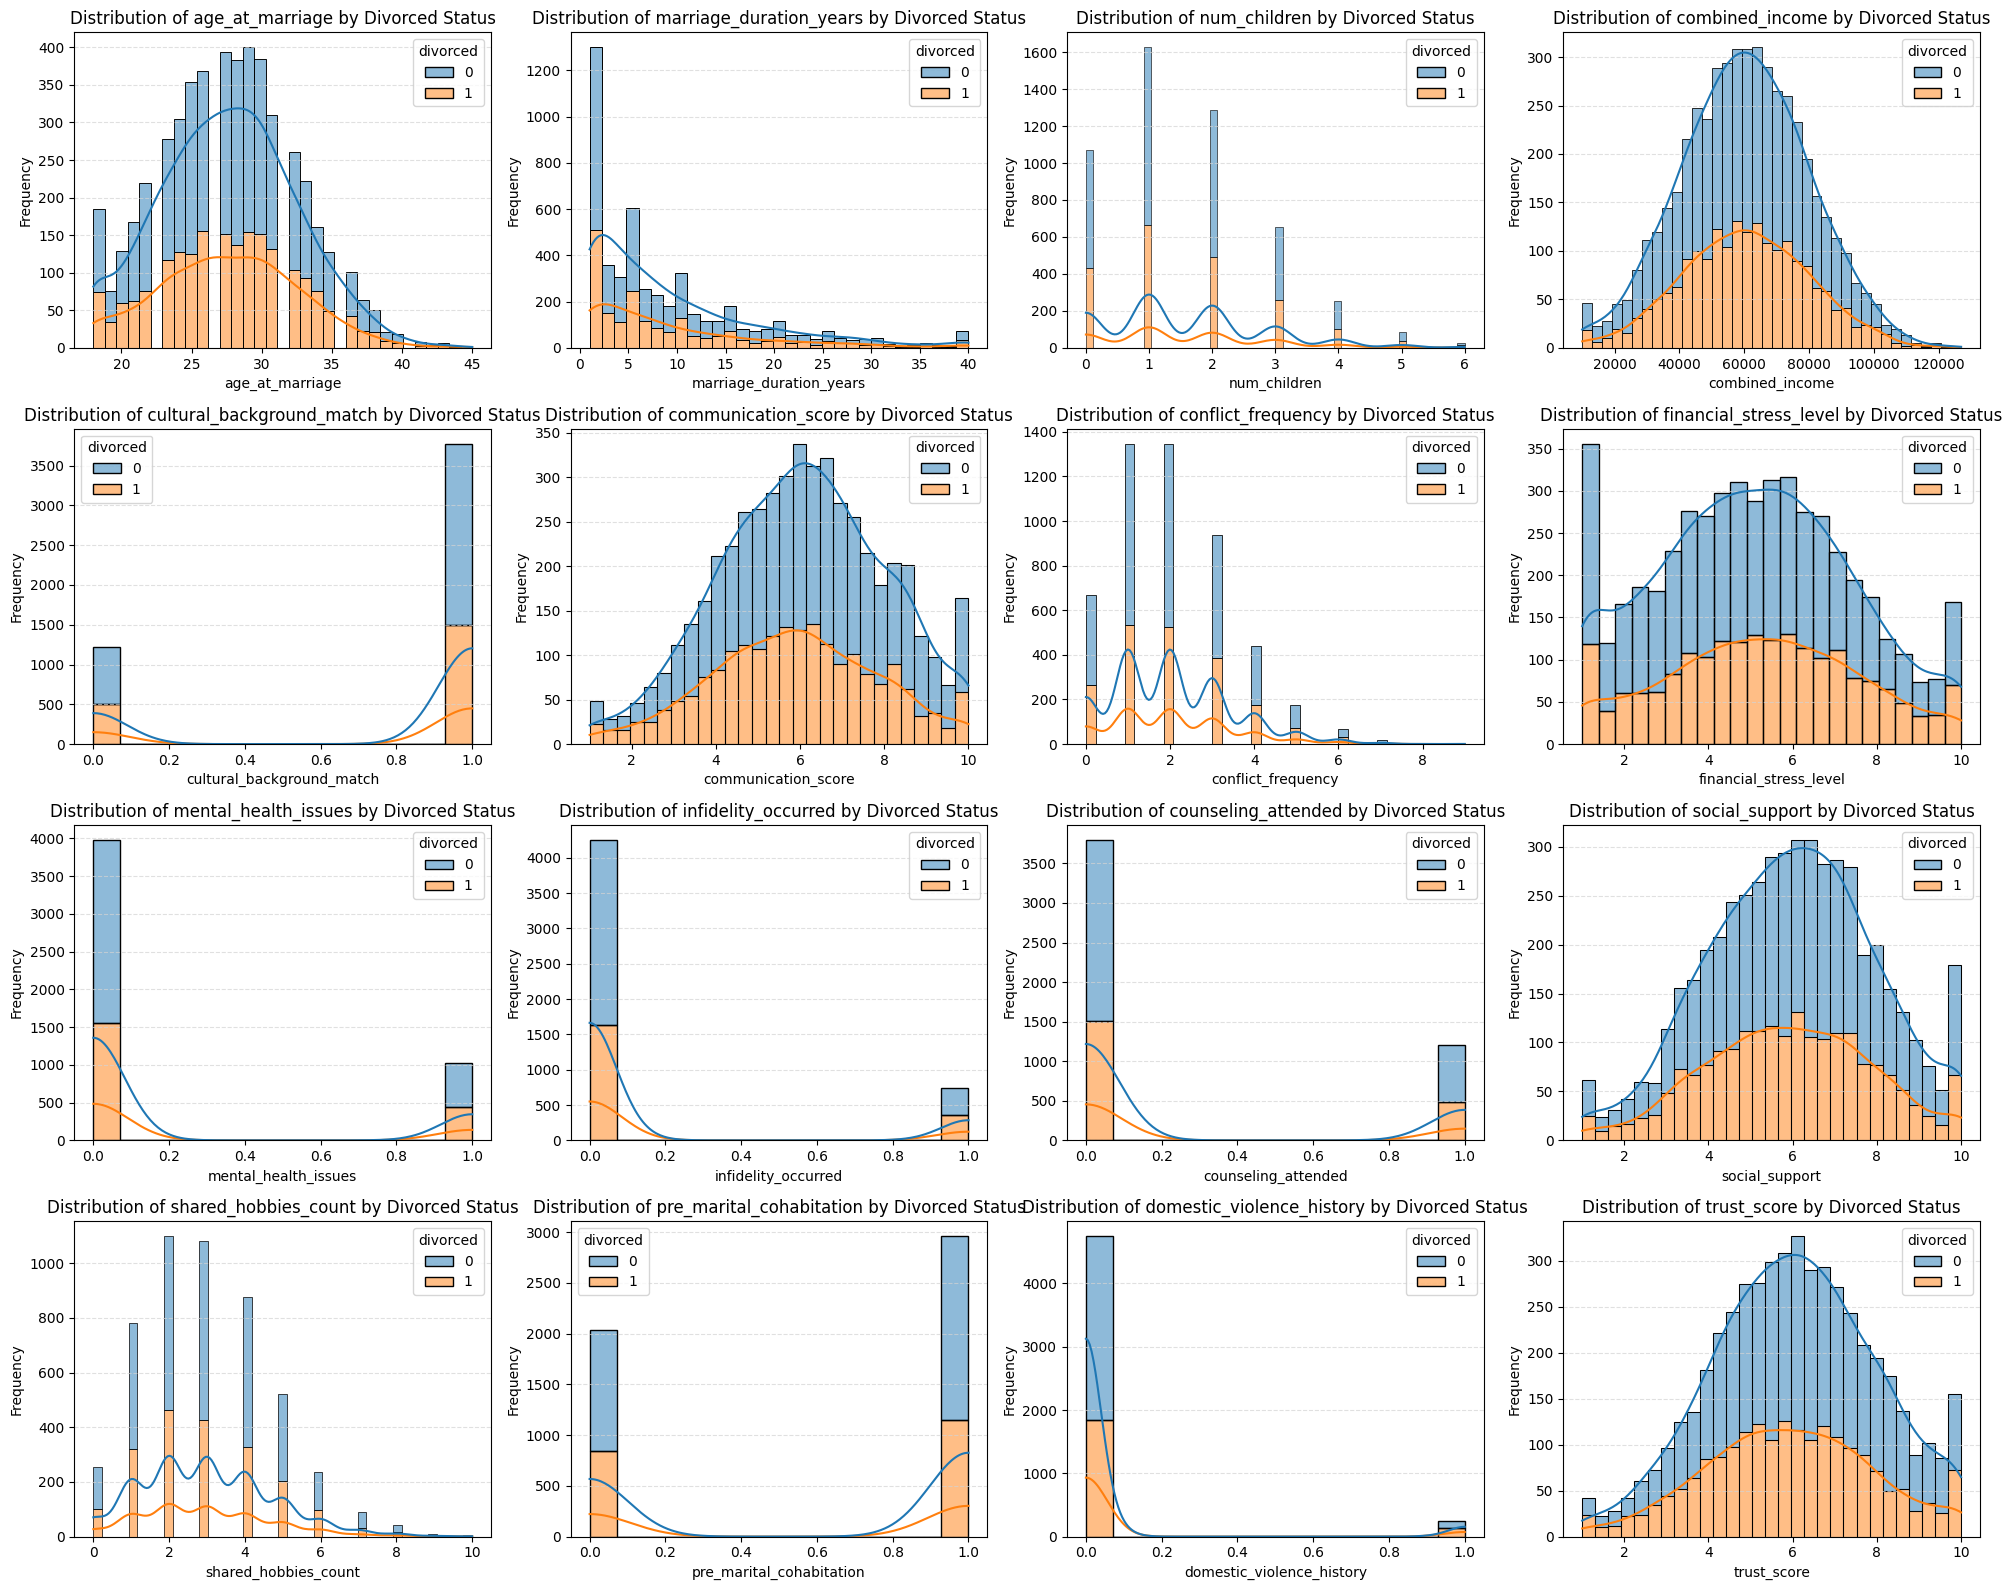

In [5]:
# Visualize continuous variables with histograms (excluding 'divorced') by divorced status
continuous_cols = df_copy.select_dtypes(include=np.number).drop(columns=['divorced'])
n_cols = 4  # Number of columns for subplots
n_rows = (len(continuous_cols.columns) + n_cols - 1) // n_cols  # Calculate number of rows

plt.figure(figsize=(n_cols * 5, n_rows * 4)) # Adjust figure size based on number of plots

for i, col in enumerate(continuous_cols.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=df_copy, x=col, hue='divorced', kde=True, multiple='stack') # Use hue to differentiate divorced groups
    plt.title(f'Distribution of {col} by Divorced Status')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7, color='lightgray') # Add light gray grid

plt.tight_layout()
plt.show()

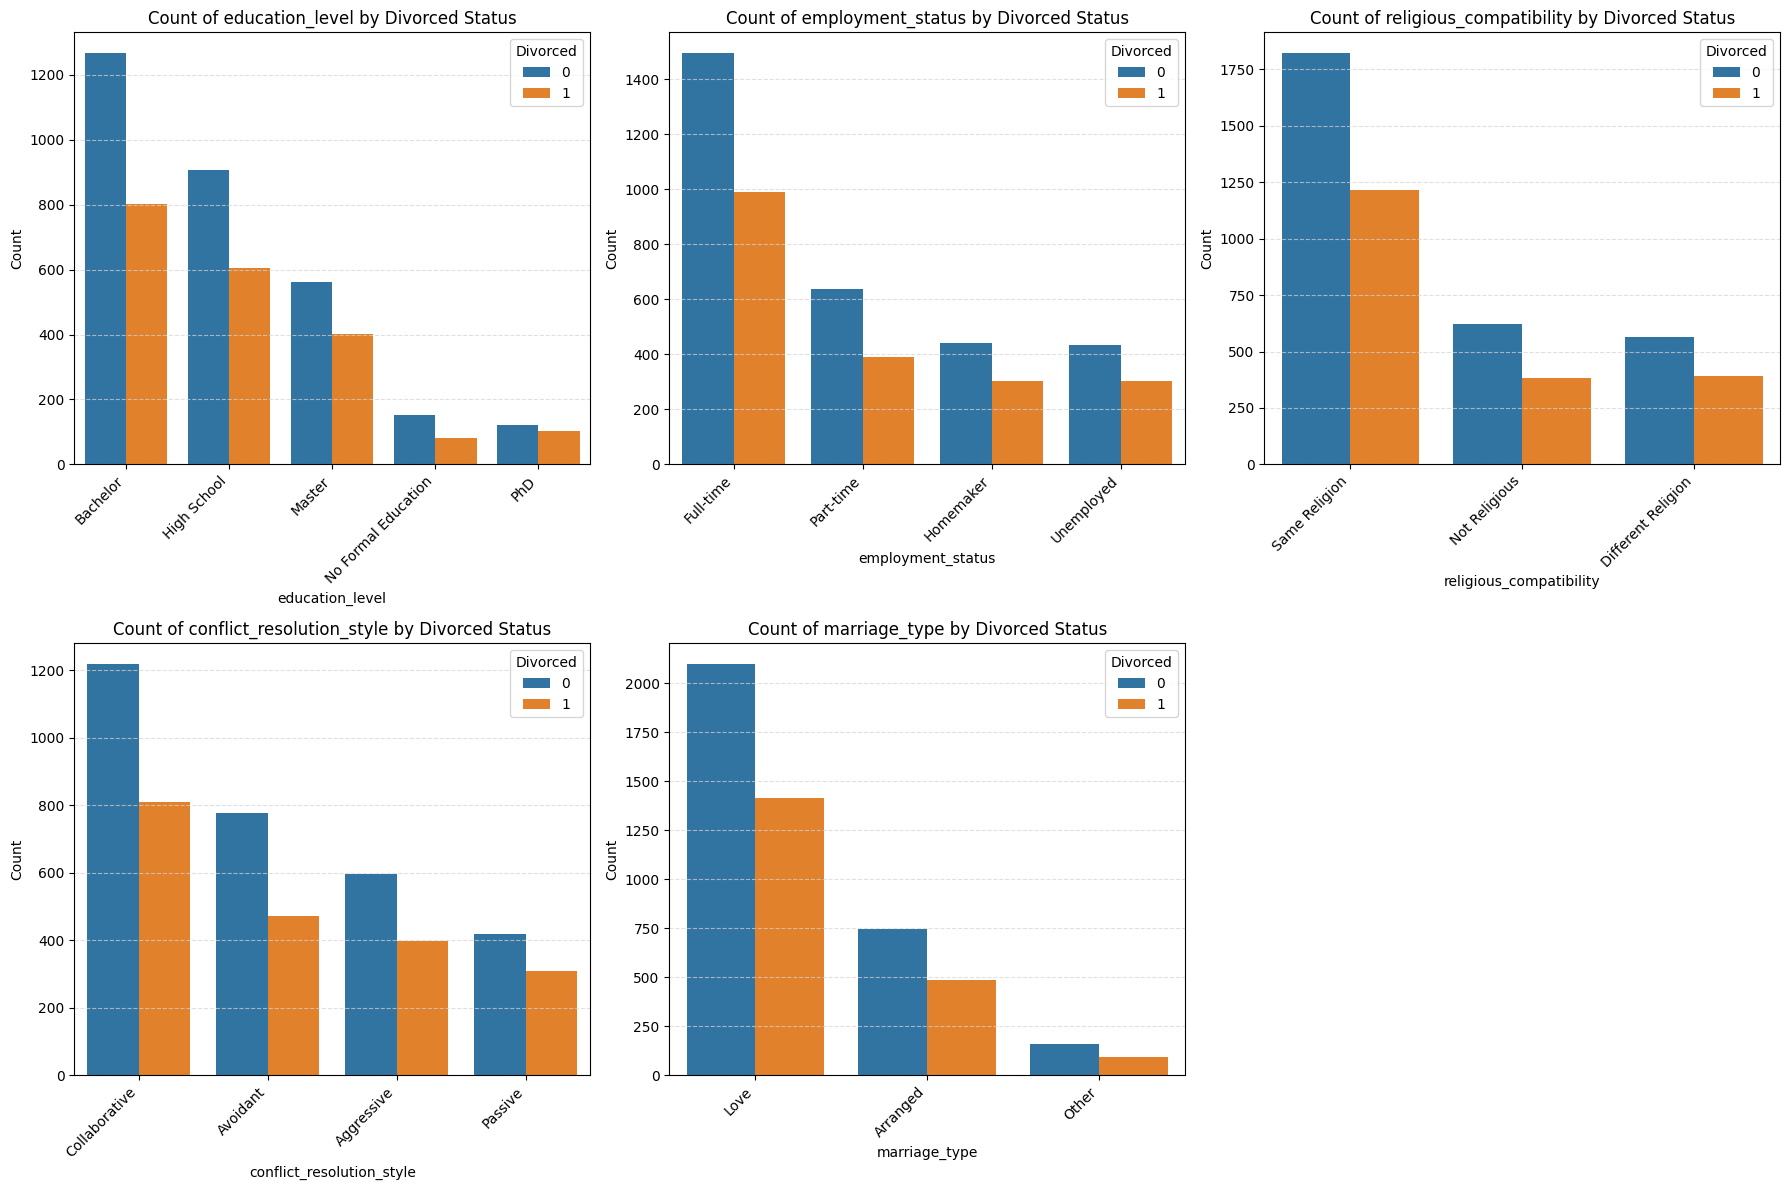

In [6]:
# Visualize categorical and binary variables with count plots by divorced status
categorical_cols = df_copy.select_dtypes(include='object')

# Filter out columns that resulted in empty plots (based on previous execution output)
# The columns that resulted in empty Series were:
# 'cultural_background_match', 'mental_health_issues', 'infidelity_occurred',
# 'counseling_attended', 'pre_marital_cohabitation', 'domestic_violence_history'
cols_to_exclude = ['cultural_background_match', 'mental_health_issues', 'infidelity_occurred',
                   'counseling_attended', 'pre_marital_cohabitation', 'domestic_violence_history']
categorical_cols = categorical_cols.drop(columns=cols_to_exclude, errors='ignore')


n_cols = 3  # Number of columns for subplots
n_rows = (len(categorical_cols.columns) + n_cols - 1) // n_cols  # Calculate number of rows

plt.figure(figsize=(n_cols * 6, n_rows * 6)) # Adjust figure size based on number of plots

for i, col in enumerate(categorical_cols.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df_copy, x=col, hue='divorced', order=df_copy[col].value_counts().index) # Use hue to differentiate divorced groups
    plt.title(f'Count of {col} by Divorced Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Divorced') # Add a legend
    plt.grid(axis='y', linestyle='--', alpha=0.7, color='lightgray') # Add light gray grid

plt.tight_layout()
plt.show()

In [7]:
# Separate continuous and categorical/binary variables
continuous_cols = df_copy.select_dtypes(include=np.number)
categorical_cols = df_copy.select_dtypes(include='object')

# Summary for continuous variables (Mean and Standard Deviation) by Divorced Status
print("Summary of Continuous Variables (Mean and Standard Deviation) by Divorced Status:")
display(df_copy.groupby('divorced')[continuous_cols.columns].agg(['mean', 'std']).T)

# print("\nPercentages for Categorical and Binary Variables by Divorced Status:")
# # Create a dictionary to store categorical summaries
# categorical_summaries = {}
# for col in categorical_cols.columns:
#     print(f"\nColumn: {col}")
#     col_summary = df_copy.groupby('divorced')[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
#     display(col_summary)
#     categorical_summaries[col] = col_summary.unstack(level=0) # Unstack to get divorced status as columns

# # Example of how to access a specific categorical summary DataFrame
# # education_level_summary_df = categorical_summaries['education_level']
# # display(education_level_summary_df)

Summary of Continuous Variables (Mean and Standard Deviation) by Divorced Status:


divorced                                   0             1
age_at_marriage           mean     27.554005     27.628327
                          std       4.801563      4.937955
marriage_duration_years   mean      9.098372      9.280763
                          std       8.753322      8.990952
num_children              mean      1.557993      1.544952
                          std       1.239065      1.260479
combined_income           mean  60029.539050  60508.040683
                          std   19725.160773  19567.787680
cultural_background_match mean      0.759056      0.749874
                          std       0.427727      0.433194
communication_score       mean      6.160605      5.859002
                          std       1.953886      1.964163
conflict_frequency        mean      1.995680      2.026620
                          std       1.407964      1.419107
financial_stress_level    mean      4.938108      5.272970
                          std       2.334331      2.300122
mental_health_issues      mean      0.191426      0.222501
                          std       0.393489      0.416031
infidelity_occurred       mean      0.127285      0.181818
                          std       0.333347      0.385792
counseling_attended       mean      0.237288      0.245103
                          std       0.425491      0.430256
social_support            mean      6.020800      5.885323
                          std       1.964432      1.964805
shared_hobbies_count      mean      2.996012      2.937217
                          std       1.711580      1.711791
pre_marital_cohabitation  mean      0.602193      0.577097
                          std       0.489526      0.494144
domestic_violence_history mean      0.036225      0.071823
                          std       0.186880      0.258260
trust_score               mean      6.109617      5.910994
                          std       1.900933      1.974763
divorced                  mean      0.000000      1.000000
                          std       0.000000      0.000000

In [8]:
# Separate continuous and categorical/binary variables
continuous_cols = df_copy.select_dtypes(include=np.number)
categorical_cols = df_copy.select_dtypes(include='object')

# Summary for continuous variables (Mean and Standard Deviation) by Divorced Status
print("Summary of Continuous Variables (Mean and Standard Deviation) by Divorced Status:")
display(df_copy.groupby('divorced')[continuous_cols.columns].agg(['mean', 'std']).T)

# Summary for Categorical and Binary Variables (Count and Percentage)
print("\nSummary of Categorical and Binary Variables (Count and Percentage) by Divorced Status:")

# List of variables to summarize as requested by the user
variables_to_summarize = [
    'education_level',
    'employment_status',
    'religious_compatibility',
    'cultural_background_match',
    'conflict_resolution_style',
    'mental_health_issues',
    'infidelity_occurred',
    'counseling_attended',
    'marriage_type',
    'domestic_violence_history'
]

for col in variables_to_summarize:
    if col in df_copy.columns:
        print(f"\nColumn: {col}")
        # Calculate count and percentage by 'divorced' status
        count_summary = df_copy.groupby('divorced')[col].value_counts().unstack(fill_value=0)
        percentage_summary = df_copy.groupby('divorced')[col].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2).astype(str) + '%'

        print("Count:")
        display(count_summary)
        print("Percentage:")
        display(percentage_summary)
    else:
        print(f"Column '{col}' not found in the DataFrame.")

Summary of Continuous Variables (Mean and Standard Deviation) by Divorced Status:


divorced                                   0             1
age_at_marriage           mean     27.554005     27.628327
                          std       4.801563      4.937955
marriage_duration_years   mean      9.098372      9.280763
                          std       8.753322      8.990952
num_children              mean      1.557993      1.544952
                          std       1.239065      1.260479
combined_income           mean  60029.539050  60508.040683
                          std   19725.160773  19567.787680
cultural_background_match mean      0.759056      0.749874
                          std       0.427727      0.433194
communication_score       mean      6.160605      5.859002
                          std       1.953886      1.964163
conflict_frequency        mean      1.995680      2.026620
                          std       1.407964      1.419107
financial_stress_level    mean      4.938108      5.272970
                          std       2.334331      2.300122
mental_health_issues      mean      0.191426      0.222501
                          std       0.393489      0.416031
infidelity_occurred       mean      0.127285      0.181818
                          std       0.333347      0.385792
counseling_attended       mean      0.237288      0.245103
                          std       0.425491      0.430256
social_support            mean      6.020800      5.885323
                          std       1.964432      1.964805
shared_hobbies_count      mean      2.996012      2.937217
                          std       1.711580      1.711791
pre_marital_cohabitation  mean      0.602193      0.577097
                          std       0.489526      0.494144
domestic_violence_history mean      0.036225      0.071823
                          std       0.186880      0.258260
trust_score               mean      6.109617      5.910994
                          std       1.900933      1.974763
divorced                  mean      0.000000      1.000000
                          std       0.000000      0.000000


Summary of Categorical and Binary Variables (Count and Percentage) by Divorced Status:

Column: education_level
Count:


education_level,Bachelor,High School,Master,No Formal Education,PhD
divorced,,,,,
0,1267,908,561,151,122
1,802,605,402,80,102


Percentage:


education_level,Bachelor,High School,Master,No Formal Education,PhD
divorced,,,,,
0,42.11%,30.18%,18.64%,5.02%,4.05%
1,40.28%,30.39%,20.19%,4.02%,5.12%



Column: employment_status
Count:


employment_status,Full-time,Homemaker,Part-time,Unemployed
divorced,,,,
0,1496,443,637,433
1,991,305,391,304


Percentage:


employment_status,Full-time,Homemaker,Part-time,Unemployed
divorced,,,,
0,49.72%,14.72%,21.17%,14.39%
1,49.77%,15.32%,19.64%,15.27%



Column: religious_compatibility
Count:


religious_compatibility,Different Religion,Not Religious,Same Religion
divorced,,,
0,565,621,1823
1,392,382,1217


Percentage:


religious_compatibility,Different Religion,Not Religious,Same Religion
divorced,,,
0,18.78%,20.64%,60.58%
1,19.69%,19.19%,61.13%



Column: cultural_background_match
Count:


cultural_background_match,0,1
divorced,,
0,725,2284
1,498,1493


Percentage:


cultural_background_match,0,1
divorced,,
0,24.09%,75.91%
1,25.01%,74.99%



Column: conflict_resolution_style
Count:


conflict_resolution_style,Aggressive,Avoidant,Collaborative,Passive
divorced,,,,
0,595,777,1219,418
1,399,473,809,310


Percentage:


conflict_resolution_style,Aggressive,Avoidant,Collaborative,Passive
divorced,,,,
0,19.77%,25.82%,40.51%,13.89%
1,20.04%,23.76%,40.63%,15.57%



Column: mental_health_issues
Count:


mental_health_issues,0,1
divorced,,
0,2433,576
1,1548,443


Percentage:


mental_health_issues,0,1
divorced,,
0,80.86%,19.14%
1,77.75%,22.25%



Column: infidelity_occurred
Count:


infidelity_occurred,0,1
divorced,,
0,2626,383
1,1629,362


Percentage:


infidelity_occurred,0,1
divorced,,
0,87.27%,12.73%
1,81.82%,18.18%



Column: counseling_attended
Count:


counseling_attended,0,1
divorced,,
0,2295,714
1,1503,488


Percentage:


counseling_attended,0,1
divorced,,
0,76.27%,23.73%
1,75.49%,24.51%



Column: marriage_type
Count:


marriage_type,Arranged,Love,Other
divorced,,,
0,747,2100,162
1,484,1413,94


Percentage:


marriage_type,Arranged,Love,Other
divorced,,,
0,24.83%,69.79%,5.38%
1,24.31%,70.97%,4.72%



Column: domestic_violence_history
Count:


domestic_violence_history,0,1
divorced,,
0,2900,109
1,1848,143


Percentage:


domestic_violence_history,0,1
divorced,,
0,96.38%,3.62%
1,92.82%,7.18%
